In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

# unpacking the dataset into training and testing 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

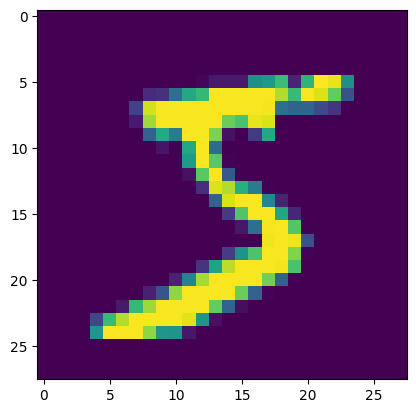

In [2]:
import matplotlib.pyplot as plt 

# this is our 1st image in the train dataset
plt.imshow(x_train[0])

# the image is a multidimensional array => a tensor
print(x_train[0])

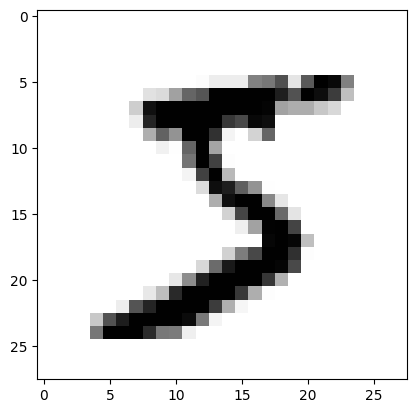

In [3]:
# this is actually a black and white image 

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
# we want to NORMALIZE/SCALE the data
# as you can see, some of the above values are between 0-255

x_train = tf.keras.utils.normalize(x_train, axis=1) # setting axis to 1
x_test = tf.keras.utils.normalize(x_test, axis=1)

# You can see how the image changed:

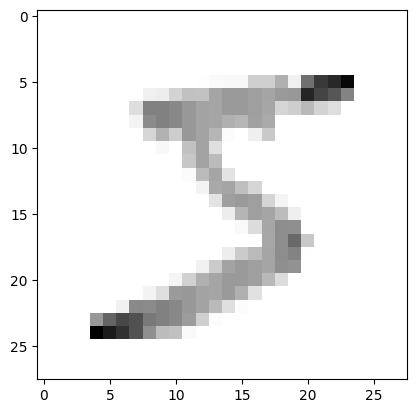

In [5]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [7]:
print(x_train[0])

# Now, the values have been scaled to values between 0-1
# This makes it easier for the NN to learn (normalization however is not required)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# BUILDING THE MODEL

# Simple sequential feed-forward model 

model = tf.keras.models.Sequential()

# Flattening the data: 
model.add(tf.keras.layers.Flatten())

# Adding 2 Dense layers, specifying the number of units/neurons in the layer - 128; 
# specifying the activation function to be ReLU 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# Adding an Output layer, which has n neurons where n is the number of classes 
# specifying the activation function to be softmax because we want the output to be a probability distribution 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# COMPILING THE MODEL:
# Specifying the parameters => optimizer, loss

model.compile( optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# TRAINING THE MODEL:
# model.fit(pass what you want to fit)

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2632 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1067 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9774


In [9]:
# NN are great at fitting, the question is - did it overfit ? 
# the hope is that the model "Generalized" - recognized the patters of each individual class 
# as opposed to memorize each image (overfit)

# VALIDATING THE MODEL:
# calculating the validation loss/accuracy

val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

313/313 [==============================] - 0s 846us/step - loss: 0.0963 - accuracy: 0.9699
0.09630751609802246 0.9699000120162964


In [12]:
# SAVING THE MODEL

model.save('L1_model.model')

INFO:tensorflow:Assets written to: L1_model.model\assets


INFO:tensorflow:Assets written to: L1_model.model\assets


In [13]:
# LOADING THE MODEL

new_model = tf.keras.models.load_model('L1_model.model')

In [14]:
# MAKING A PREDICTION
# keep in mind: prediction always takes in a list

predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 811us/step


In [15]:
print(predictions)

# these are all 1-hot arrays
# these are the probability distributions

[[2.26774191e-08 2.51784797e-08 2.13011913e-06 ... 9.99973416e-01
  3.57478228e-07 1.03015645e-06]
 [4.99579800e-09 2.69662385e-04 9.99726474e-01 ... 1.06514930e-08
  5.53536594e-08 3.16116924e-13]
 [6.95301905e-09 9.99763668e-01 2.58730397e-05 ... 6.93895054e-05
  3.12573356e-05 7.17210753e-08]
 ...
 [3.19678373e-09 3.40878756e-08 7.08730363e-09 ... 5.57098028e-05
  8.49326716e-06 4.77410904e-05]
 [1.43459170e-06 1.04980536e-07 5.23102139e-09 ... 3.38279915e-06
  7.14827183e-06 2.34109110e-09]
 [1.63697132e-06 1.33609133e-08 3.74430471e-07 ... 1.84706875e-10
  1.06758485e-07 2.65240918e-09]]


In [17]:
import numpy as np

print(np.argmax(predictions[0]))

# the prediction for the 0-th image in x_test is 7 

7


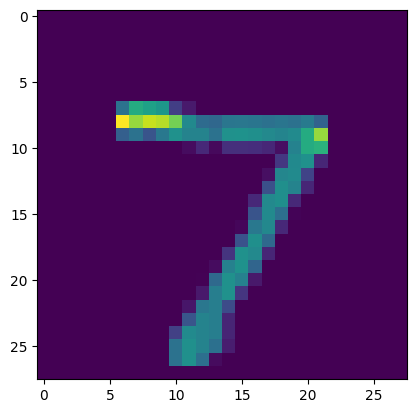

In [18]:
# showing the image 

plt.imshow(x_test[0])
plt.show()

1/1 [==============================] - 0s 40ms/step
The result is probably: 3


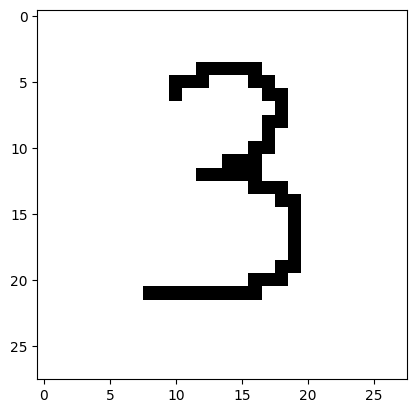

1/1 [==============================] - 0s 15ms/step
The result is probably: 2


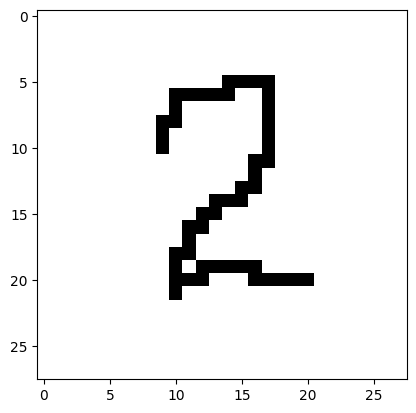

1/1 [==============================] - 0s 15ms/step
The result is probably: 7


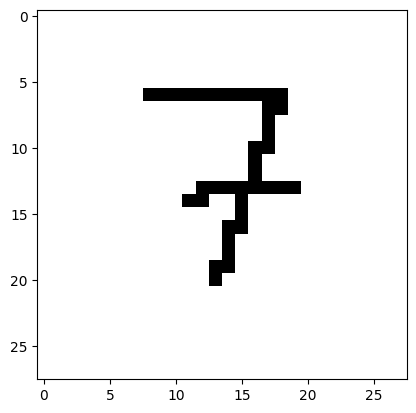

1/1 [==============================] - 0s 15ms/step
The result is probably: 8


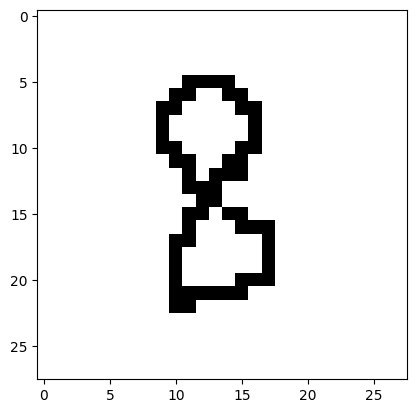

1/1 [==============================] - 0s 16ms/step
The result is probably: 9


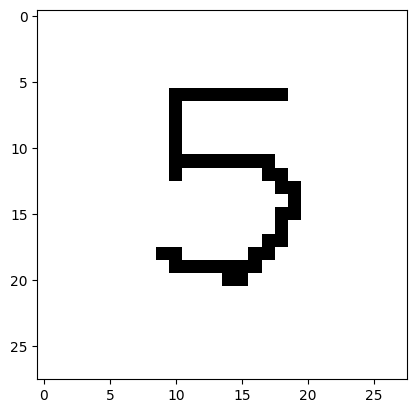

1/1 [==============================] - 0s 14ms/step
The result is probably: 1


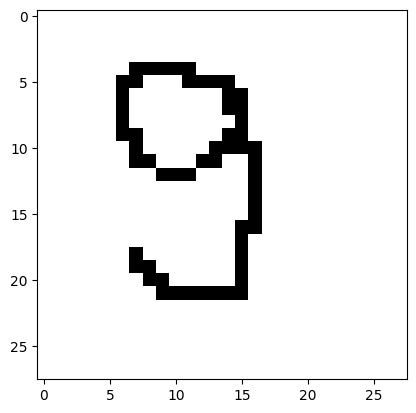

1/1 [==============================] - 0s 15ms/step
The result is probably: 8


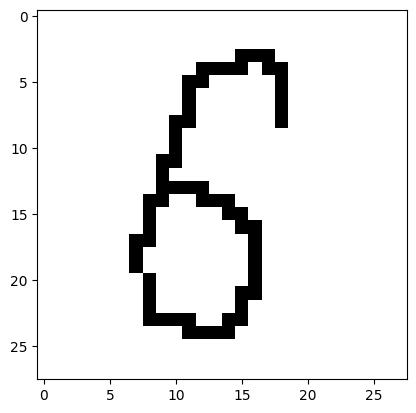

1/1 [==============================] - 0s 15ms/step
The result is probably: 4


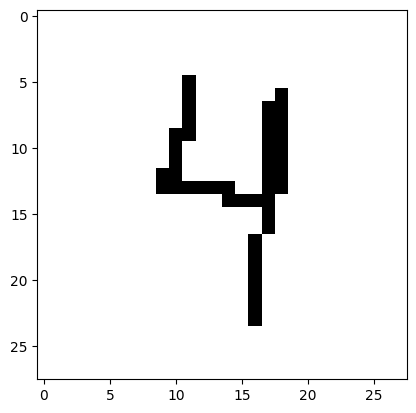

1/1 [==============================] - 0s 15ms/step
The result is probably: 0


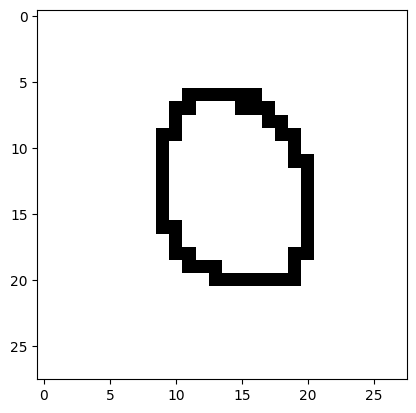

1/1 [==============================] - 0s 15ms/step
The result is probably: 0


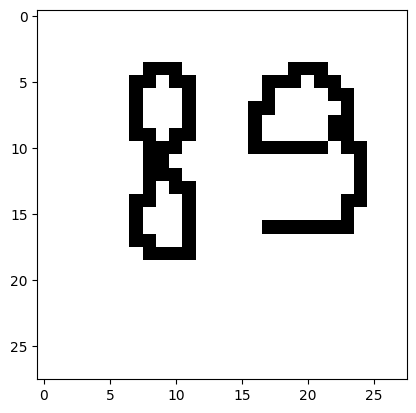

In [4]:
import cv2 as cv

# LOADING THE MODEL 

# Load the saved model
model = tf.keras.models.load_model('L1_model.model')


for x in range(1,11):

    image_path = (f'{x}.png')
    img = cv.imread(image_path)

    if img is not None:
        img = img[:, :, 0]
        # Continue processing the image
    else:
        print("Failed to read the image file.")
    
    img = np.invert(np.array([img])) # setting black on white digits 

    prediction = model.predict(img) # softmax results of our NN
    # NOTE: index of neuron matches the class (0-9)
    # => highest activation at index 6 => the result is 6
    # getting the index of highest value:
    print(f'The result is probably: {np.argmax(prediction)}')

    plt.imshow(img[0], cmap= plt.cm.binary) # chaning colormap
    plt.show()
